In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.image import imread

from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# Load the image Data

In [2]:
%%time
b_d=os.listdir('/kaggle/input/wafermap/WaferMap/balanced')
for i in b_d:
   print( i,len(os.listdir('/kaggle/input/wafermap/WaferMap/balanced/'+i)))
print("==================================================================")
test_d=os.listdir('/kaggle/input/wafertestdata/B_Test')
for i in test_d:
   print( i,len(os.listdir('/kaggle/input/wafertestdata/B_Test/'+i)))

Edge-ring 409
Edge-loc 409
Near-Full 409
Scratch 409
None 409
Loc 409
Donut 409
Center 409
Random 409
Edge-ring 100
Edge-loc 100
Near-Full 54
Scratch 100
None 101
Loc 100
Donut 100
Center 100
Random 100
CPU times: user 14.7 ms, sys: 13.7 ms, total: 28.4 ms
Wall time: 89.3 ms


In [3]:
b_path='/kaggle/input/wafermap/WaferMap/balanced/'
sample_wafer=[]
for i in b_d:
    sample_wafer.append(b_path+i+'/'+os.listdir(b_path+i+'/')[0])
sample_wafer
   

['/kaggle/input/wafermap/WaferMap/balanced/Edge-ring/Edge-ring_265.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Edge-loc/Edge-loc_91.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Near-Full/Near-full_11.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Scratch/Scratch_222.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/None/None_300.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Loc/Loc_319.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Donut/Donut_97.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Center/center_381.jpg',
 '/kaggle/input/wafermap/WaferMap/balanced/Random/Random_372.jpg']

# Plot sample wafer defects

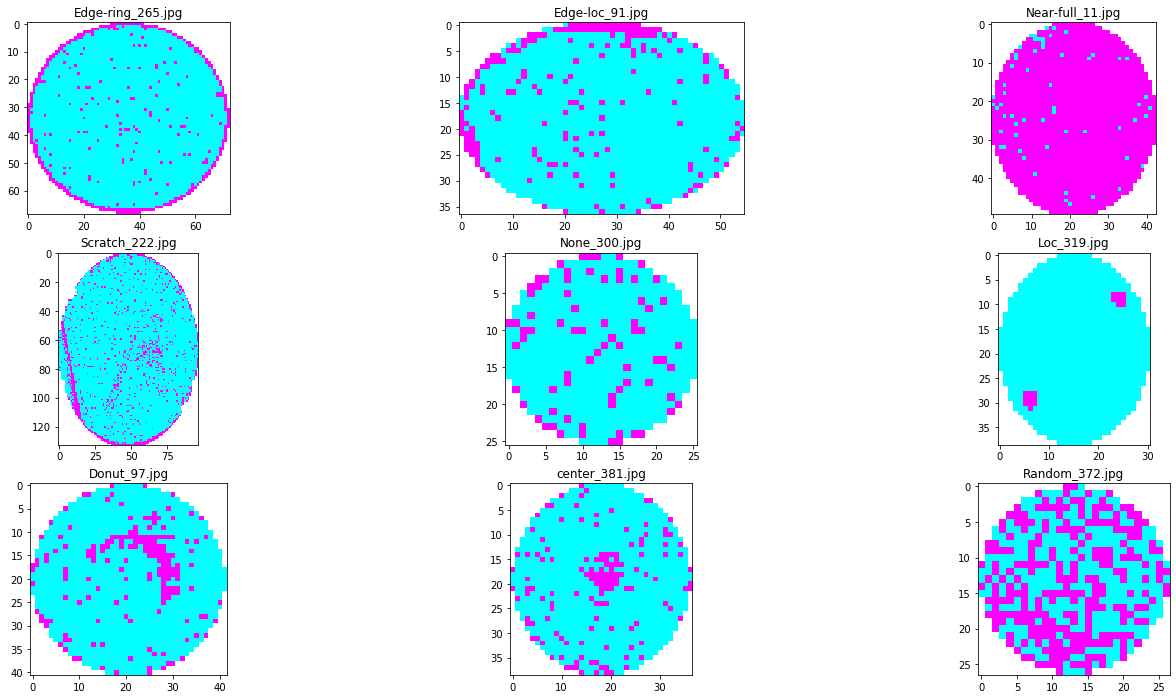

In [4]:
# plt.figure(figsize=(24,12))
f, axarr = plt.subplots(3,3,figsize=(24,12))
m=0
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(imread(sample_wafer[m]))
        axarr[i,j].set_title(os.path.basename(sample_wafer[m])) 
        m+=1
 

# Get the dimensions of the images to adjust the Input Shape


In [5]:
def dimension(path,dim1,dim2):
    for image_filename in os.listdir(path): 
        image=imread(path+image_filename)
        d1,d2,channels=image.shape
        dim1.append(d1)
        dim2.append(d2)
#         print(channels)
    return dim1,dim2

loc_dim1=[]
loc_dim2=[]
loc_dim1,loc_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Loc/',loc_dim1,loc_dim2)

edgeRing_dim1=[]
edgeRing_dim2=[]
edgeRing_dim1,edgeRing_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Edge-ring/',edgeRing_dim1,edgeRing_dim2)

edgeLoc_dim1=[]
edgeLoc_dim2=[]
edgeLoc_dim1,edgeLoc_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Edge-loc/',edgeLoc_dim1,edgeLoc_dim2)

center_dim1=[]
center_dim2=[]
center_dim1,center_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Center/',center_dim1,center_dim2)

random_dim1=[]
random_dim2=[]
random_dim1,random_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Random/',random_dim1,random_dim2)

scratch_dim1=[]
scratch_dim2=[]
scratch_dim1,scratch_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Scratch/',scratch_dim1,scratch_dim2)

nearFull_dim1=[]
nearFull_dim2=[]
nearFull_dim1,nearFull_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Near-Full/',nearFull_dim1,nearFull_dim2)

donut_dim1=[]
donut_dim2=[]
donut_dim1,donut_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/Donut/',donut_dim1,donut_dim2)

none_dim1=[]
none_dim2=[]
none_dim1,none_dim2=dimension('/kaggle/input/wafermap/WaferMap/balanced/None/',donut_dim1,donut_dim2)
    



In [6]:
np.mean(scratch_dim1)

63.645476772616135

In [ ]:

# img_gen=ImageDataGenerator()


In [7]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
plt.imshow(imread(sample_wafer[4]))

In [ ]:
plt.imshow(image_gen.random_transform(imread(sample_wafer[4])))

In [8]:
train_path='/kaggle/input/wafermap/WaferMap/balanced'
test_path='/kaggle/input/wafertestdata/B_Test'
# image_gen.flow_from_directory(train_path)
# image_gen.flow_from_directory(test_path)

In [9]:
batch_size = 16
img_shape=(64,65,4)

# Create Model

In [15]:
model = Sequential()

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
# POOLING LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=img_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
# POOLING LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=img_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=img_shape, activation='relu',))
# model.add(MaxPool2D(pool_size=(2, 2)))


# FLATTEN IMAGES FROM 64 by 65 to 4160 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(128, activation='sigmoid'))
# model.add(Dropout(0.5))
# LAST LAYER IS THE CLASSIFIER, THUS 9 POSSIBLE CLASSES
model.add(Dense(9, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Model Summary


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 61, 62, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5824)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1491200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [17]:

early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [18]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgba',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3681 images belonging to 9 classes.


In [19]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgba',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle=False)

Found 855 images belonging to 9 classes.


In [37]:
test_image_gen.class_indices.keys()

dict_keys(['Center', 'Donut', 'Edge-loc', 'Edge-ring', 'Loc', 'Near-Full', 'None', 'Random', 'Scratch'])

In [ ]:
train_image_gen.class_indices

# Train the model

In [20]:
results = model.fit_generator(train_image_gen,epochs=50,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Train for 231 steps, validate for 54 steps
Epoch 1/50
231/231 [==============================] - 20s 85ms/step - loss: 1.2408 - accuracy: 0.5393 - val_loss: 1.0598 - val_accuracy: 0.6480
Epoch 2/50
231/231 [==============================] - 14s 61ms/step - loss: 0.8425 - accuracy: 0.7001 - val_loss: 0.7553 - val_accuracy: 0.7474
Epoch 3/50
231/231 [==============================] - 14s 60ms/step - loss: 0.7064 - accuracy: 0.7411 - val_loss: 0.7826 - val_accuracy: 0.7462
Epoch 4/50
231/231 [==============================] - 14s 61ms/step - loss: 0.6513 - accuracy: 0.7691 - val_loss: 0.7149 - val_accuracy: 0.7649
Epoch 5/50
231/231 [==============================] - 15s 66ms/step - loss: 0.5847 - accuracy: 0.7938 - val_loss: 0.6423 - val_accuracy: 0.7743
Epoch 6/50
231/231 [==============================] - 14s 62ms/step - loss: 0.5296 - accuracy: 0.8120 - val_loss: 0.5436 - val_accuracy: 0.8199
Epoch 7/50
231/231 [==============================] - 14s 59ms/step - loss: 0.5209 - accuracy

# Confusion and Classification metrics

In [32]:
target_names=['Center', 'Donut', 'Edge-loc', 'Edge-ring', 'Loc', 'Near-Full', 'None', 'Random', 'Scratch']
Y_pred=model.predict_generator(test_image_gen,855)
y_pred=np.argmax(Y_pred,axis=1)


Text(0.5, 145.31999999999996, 'Predicted')

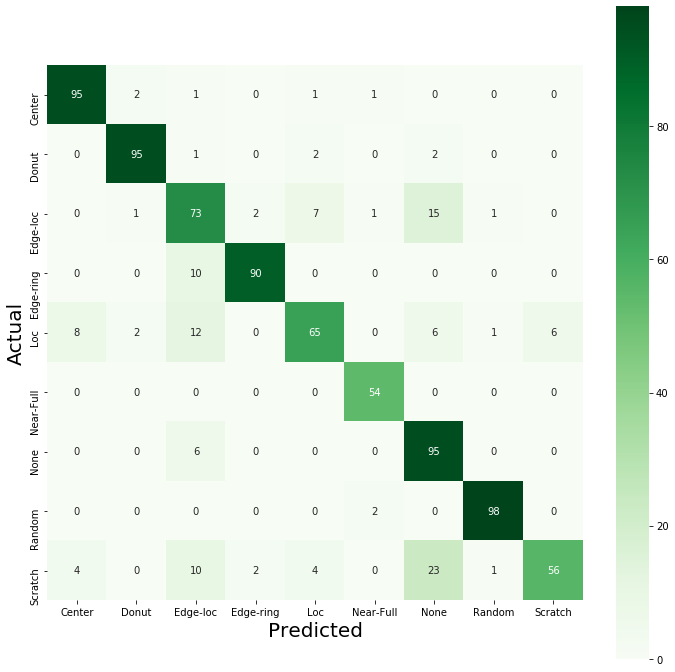

In [55]:
con_matrix=confusion_matrix(test_image_gen.classes,y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(con_matrix, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=target_names, yticklabels=target_names)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [57]:
report=classification_report(test_image_gen.classes,y_pred,target_names=target_names,output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
Center,0.887850,0.950000,0.917874,100.000000
Donut,0.950000,0.950000,0.950000,100.000000
Edge-loc,0.646018,0.730000,0.685446,100.000000
Edge-ring,0.957447,0.900000,0.927835,100.000000
Loc,0.822785,0.650000,0.726257,100.000000
Near-Full,0.931034,1.000000,0.964286,54.000000
None,0.673759,0.940594,0.785124,101.000000
Random,0.970297,0.980000,0.975124,100.000000
Scratch,0.903226,0.560000,0.691358,100.000000
accuracy,0.843275,0.843275,0.843275,0.843275


In [ ]:
# model.save('to_deploy.h5')

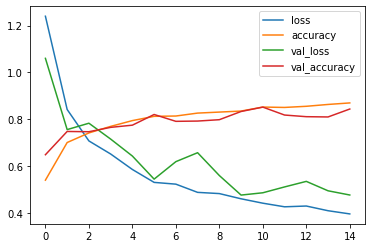

In [56]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation 


In [ ]:
from tensorflow.keras.preprocessing import image

plt.imshow(imread(sample_wafer[6]))

In [ ]:
eval_image = image.load_img(sample_wafer[6],target_size=img_shape,color_mode='rgba')
eval_image = image.img_to_array(eval_image)
eval_image = np.expand_dims(eval_image, axis=0)
l=model.predict(eval_image)
keys=list(test_image_gen.class_indices.keys())
print('wafer defect classifed as '+ str(keys[l.argmax()]))